# Language identification Hackathon

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
warnings.simplefilter("ignore")

In [2]:
# Loading in the datasets
df_train = pd.read_csv("train_set.csv")
df_test = pd.read_csv("test_set.csv")
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
Index = df_test.index

In [4]:
#df_test = df_test.drop(columns = ['Index'], axis = 1)

In [5]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [6]:
train_df = df_train.copy()

In [7]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [8]:
train_df.shape

(33000, 2)

In [9]:
train_df['lang_id'].value_counts()

zul    3000
afr    3000
sot    3000
ven    3000
tso    3000
nbl    3000
xho    3000
ssw    3000
nso    3000
tsn    3000
eng    3000
Name: lang_id, dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


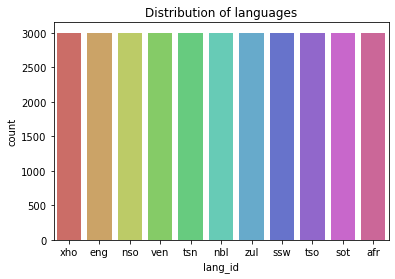

In [11]:
sns.countplot(x = 'lang_id', data = train_df, palette="hls")
plt.title("Distribution of languages");


seperate dependant and independant variables

In [12]:
X = train_df["text"]
y = train_df["lang_id"]

# Text preprocessing

In [13]:
# creating a list for appending the preprocessed text
train_df_list = []
test_df_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        train_df_list.append(text)
        
for text in df_test['text']:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        test_df_list.append(text)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(train_df_list)
XX = cv.transform(test_df_list)
X.shape # (33000, 105196)
XX.shape # (5682, 26721)

(5682, 105196)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Model training and predicting

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9995454545454545


In [19]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       587
         eng       1.00      1.00      1.00       607
         nbl       1.00      1.00      1.00       612
         nso       1.00      1.00      1.00       630
         sot       1.00      1.00      1.00       595
         ssw       1.00      1.00      1.00       637
         tsn       1.00      1.00      1.00       566
         tso       1.00      1.00      1.00       591
         ven       1.00      1.00      1.00       630
         xho       1.00      1.00      1.00       543
         zul       1.00      1.00      1.00       602

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [20]:

y_p = model.predict(XX)

# create submission dataframe
submission = pd.DataFrame(
    {'index': df_test['index'],
     'lang_id':y_p
    })

In [21]:
# save DataFrame to csv file for submission
submission.to_csv("full_set.csv", index=False)